# Install dependencies

In [1]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


pip install opencv-python

# Import libraries

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
import cv2
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

# Get Data.
### This notebook is tested with Fashion Mnist Dataset

In [3]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

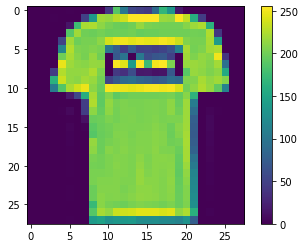

In [4]:
plt.figure()
plt.imshow(train_images[1])
plt.colorbar()
plt.grid(False)
plt.show()

### Plot Data and Define classnames for the data

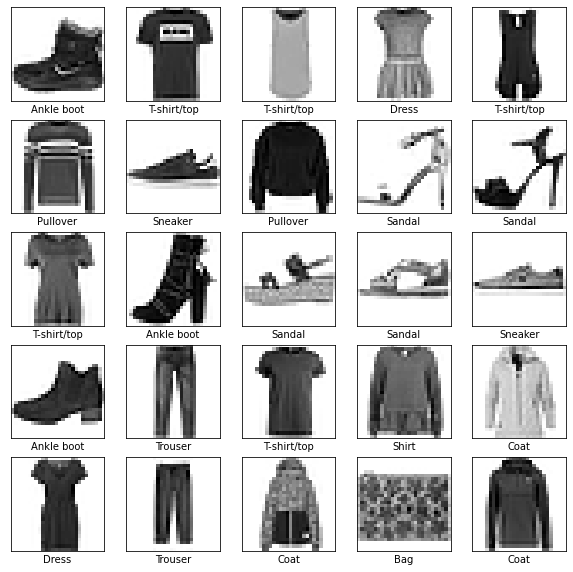

In [7]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

### Resize the Images to 28x 28 and convert them to grayscale (not required for Fashion Mnist data and Mnist data)

In [6]:
# the list of data (i.e., images) and class images
print("[INFO] loading and resizing training images...")
data = []
# loop over the image paths
for img in train_images:
    image = cv2.resize(img, (28, 28))
#     print(image.shape)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    data.append(gray)
train_images = np.array(data)

[INFO] loading and resizing training images...


error: OpenCV(4.5.3) /tmp/pip-req-build-3umofm98/opencv/modules/imgproc/src/color.simd_helpers.hpp:92: error: (-2:Unspecified error) in function 'cv::impl::{anonymous}::CvtHelper<VScn, VDcn, VDepth, sizePolicy>::CvtHelper(cv::InputArray, cv::OutputArray, int) [with VScn = cv::impl::{anonymous}::Set<3, 4>; VDcn = cv::impl::{anonymous}::Set<1>; VDepth = cv::impl::{anonymous}::Set<0, 2, 5>; cv::impl::{anonymous}::SizePolicy sizePolicy = cv::impl::<unnamed>::NONE; cv::InputArray = const cv::_InputArray&; cv::OutputArray = const cv::_OutputArray&]'
> Invalid number of channels in input image:
>     'VScn::contains(scn)'
> where
>     'scn' is 1


### Normalise the Images

In [8]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [9]:
print(train_labels[0], train_images[0].shape, len(train_images))
data_shape = train_images[0].shape

9 (28, 28) 60000


### Plot the grayscale resized Images

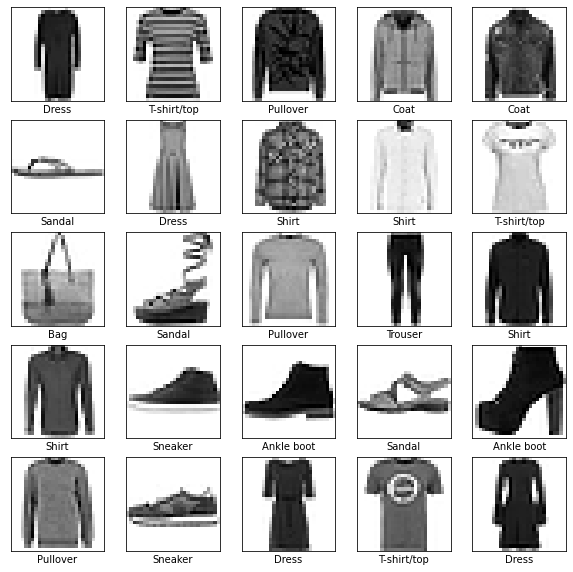

In [10]:
plt.figure(figsize=(10,10))
j = 0
for i in range(25,50):
    plt.subplot(5,5,j+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
    j = j +1
plt.show()

# Define the model

In [11]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

2021-09-03 00:45:36.259134: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [12]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


# Train the model

In [14]:
model.fit(train_images, train_labels, batch_size=128, epochs=10, verbose = 2)

2021-09-03 00:45:46.497744: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2021-09-03 00:45:46.514731: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2199995000 Hz


Epoch 1/10
469/469 - 1s - loss: 8.0997 - accuracy: 0.7461
Epoch 2/10
469/469 - 1s - loss: 1.0504 - accuracy: 0.7499
Epoch 3/10
469/469 - 1s - loss: 0.6531 - accuracy: 0.7869
Epoch 4/10
469/469 - 1s - loss: 0.5611 - accuracy: 0.8104
Epoch 5/10
469/469 - 1s - loss: 0.5102 - accuracy: 0.8246
Epoch 6/10
469/469 - 1s - loss: 0.4742 - accuracy: 0.8343
Epoch 7/10
469/469 - 1s - loss: 0.4498 - accuracy: 0.8408
Epoch 8/10
469/469 - 1s - loss: 0.4280 - accuracy: 0.8471
Epoch 9/10
469/469 - 1s - loss: 0.4165 - accuracy: 0.8509
Epoch 10/10
469/469 - 1s - loss: 0.4054 - accuracy: 0.8544


# Save the model

In [15]:
model_name = "final.h5"
model.save(model_name)

In [32]:
ls .

'Cifar Dataset Model training.ipynb'
 cifar-model.h5
 consumer.py
'Fashion Mnist Dataset Model training.ipynb'
 final.h5
'Mnist Dataset Model training.ipynb'
 mnist-model.h5
 producer.py


# Load the model

In [17]:
from tensorflow.keras.models import load_model
model = load_model(model_name)

# Evaluate the model with the test images

### Define the last layer as softmax layer

In [18]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

In [19]:
predictions = probability_model.predict(test_images)

In [20]:
print(predictions[0], test_labels[0])

[8.8365945e-16 1.2895455e-19 5.8450114e-20 1.6200786e-17 1.1082563e-29
 2.0166500e-03 4.9467707e-25 8.9846477e-03 6.0881527e-20 9.8899871e-01] 9


In [21]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.4864 - accuracy: 0.8385

Test accuracy: 0.8385000228881836


# Plot the Predictions

In [24]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

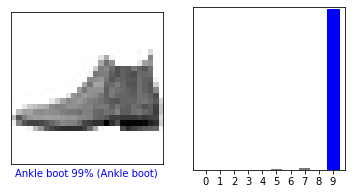

In [25]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

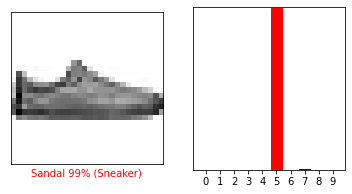

In [26]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

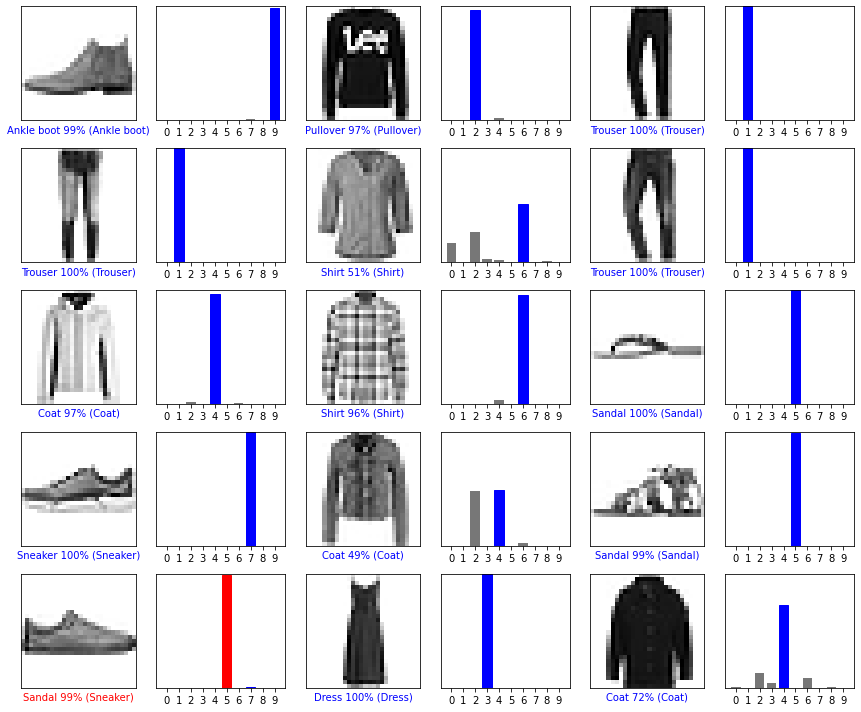

In [27]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

### Predict for 1 image

In [28]:
# Grab an image from the test dataset.
img = test_images[1]
print(img.shape)

(28, 28)


In [29]:
img = (np.expand_dims(img,0))
print(img.shape)

(1, 28, 28)


In [30]:
predictions_single = probability_model.predict(img)
print(predictions_single, np.argmax(predictions_single))

[[1.3006258e-16 8.7545975e-18 9.6902442e-01 6.1792767e-34 2.4762727e-02
  0.0000000e+00 6.2128906e-03 0.0000000e+00 9.5737706e-12 0.0000000e+00]] 2


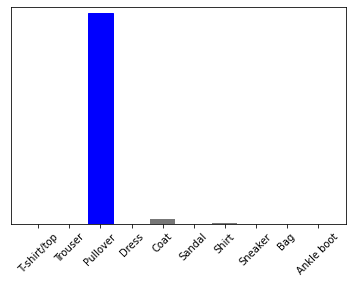

In [31]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()